# 1. Installing required libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 7
import warnings
warnings.filterwarnings("ignore")

# 2. Loading and preprocessing data

In [114]:
data = pd.read_csv('DJIA.csv', na_values = ['.'],
                            index_col=[0], parse_dates=[0])
data['DJIA'] = data['DJIA'].interpolate()
#Indices are not sorted - order the readings
data.sort_index(inplace=True)
data.head(5)

,DJIA
DATE,
2009-07-23,9069.29
2009-07-24,9093.24
2009-07-27,9108.51
2009-07-28,9096.72
2009-07-29,9070.72


# 3. Create new features based on "DATE" column

In [115]:
# Function for it
def create_features(df):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    return X

In [116]:
# Fill the function real data
X, y = create_features(data), data['DJIA']

# 4. Divide data on test and train

In [117]:
X_train, X_test = X[:-400], X[-400:]
y_train, y_test = y[:-400], y[-400:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2208, 7), (2208,), (400, 7), (400,))

# 5. Study Xgboost

In [118]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [119]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train)

[10:09:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

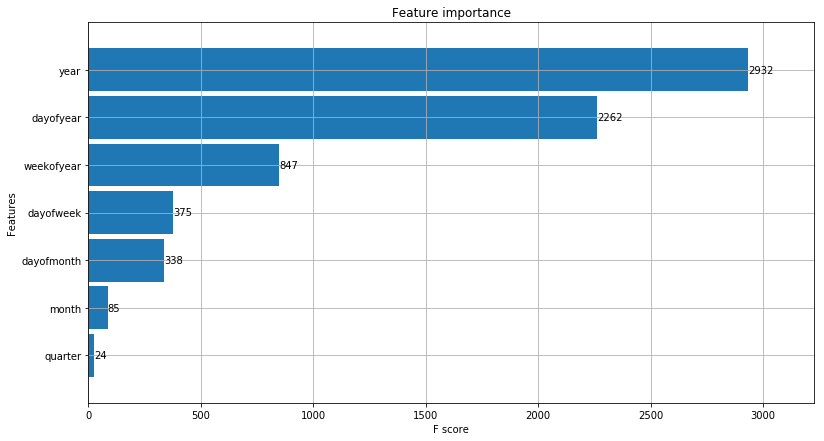

In [120]:
# Fearure importance
xgb.plot_importance(reg, height=0.9)

As we see, year and day of the year are the most valuable features for the prediction

# 6. MAPE function

To estimate the model it's better to use MAPE (mean absolute percentage error)

In [121]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 7. Define and draw predictions

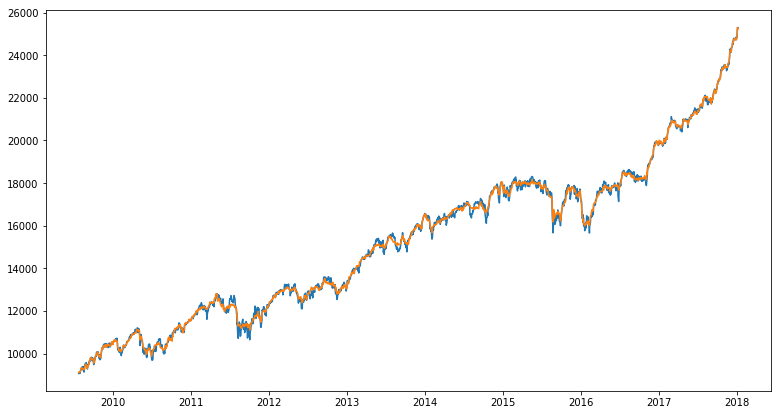

In [122]:
# Testing on train dataset
y_pred_train = reg.predict(X_train)
plt.plot(X_train.index, y_train)

plt.plot(X_train.index, y_pred_train)

In [123]:
# Define MAPE for train dataset
mean_absolute_percentage_error(y_train, y_pred_train)

0.7129996134049642

For train dataset, MAPE is near 1%. It's good, but do not give lots of information, because we tested the model on the dataset, that was used to train it

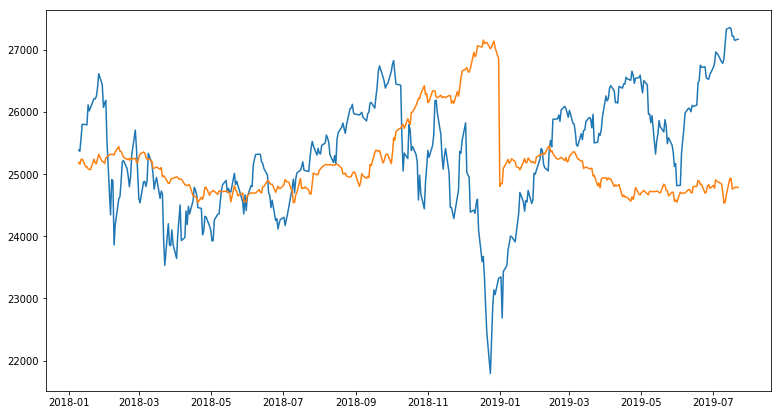

In [124]:
# Testing on test dataset 
y_pred_test = reg.predict(X_test)
plt.plot(X_test.index, y_test)
plt.plot(X_test.index, y_pred_test)

In [125]:
# Define MAPE for test dataset
mean_absolute_percentage_error(y_test, y_pred_test)

3.7955108003306632

# 8. Conclusion

MAPE for test Dataset is near 4%. This value is good for investing, but critical for trading